# <u>**KING COUNTY HOUSE PRICE PREDICTION**</u>

## BUSINESS UNDERSTANDING

**DATASET OVERVIEW**
This dataset includes house sales data from King County, Washington, which includes Seattle. It contains detailed information about houses sold between May 2014 and May 2015.

**PROBLEM STATEMENT**

In the competitive real estate market, stakeholders need accurate price predictions to make informed decisions, but current manual or heuristic methods are often inaccurate and time-consuming. This project aims to support a real estate agency that assists homeowners in buying or selling homes by developing a robust model to predict property prices based on historical data and property characteristics. Specifically, it will determine how home renovations or improvements can increase the estimated value of homes and by what margin. This information will enable the agency to offer better advice to clients, leading to more profitable sales and higher customer satisfaction..

**OBJECTIVES**
**Build a Predictive Model for House Prices**

Use linear regression to build a model that predicts the sale price of a house based on its characteristics.

Evaluate model performance and identify which features most influence price.

**Analyze the Effect of Renovation**

Investigate whether renovated houses sell for more than non-renovated ones, controlling for other variables.

Provide a data-driven estimate of the added value renovations bring.

**Generate Actionable Insights for Stakeholders**

Help real estate agencies set fair and competitive listing prices.

Help homeowners decide whether renovating their property is financially worthwhile before selling.

**Understand Feature Impact**

Quantify the influence of features like sqft_living, grade, location, and condition on sale price.

Help stakeholders prioritize improvements that give the best return on investment.

**Support Decision-Making with Visualization**

Use EDA visualizations to uncover trends and clearly communicate insights.

Support findings with visual evidence to make them easy to interpret for non-technical users.

**METHODOLOGY**

The project will follow a structured data science process, including:

**Data Collection and Inspection**: Gathering the necessary data from the provided dataset.

**Data Cleaning and Preparation**: Cleaning the data to handle missing values, outliers, and incorrect data types.

**Exploratory Data Analysis (EDA)**: Analyzing the data to find patterns, relationships, and insights.

**Modeling**: Building predictive models to estimate house prices based on selected features.

**Model Evaluation**: Assessing the models' performance using appropriate metrics.

**Interpretation**: Drawing conclusions from the model results and providing recommendations.

## **DATA UNDERSTANDING**

### **Step 1 - Load and Inspect the Data**

In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.formula.api import ols

In [2]:
#Loading the dataset
df=pd.read_csv("kc_house_data.csv")

In [3]:
#Checking the data head
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
#Checking the data tail
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,0.0,0.0,...,7,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


From the inspection of the first and the last few rows we can already observe there are columns with missing values eg Waterfront

In [5]:
#Checking the data shape
df.shape

(21597, 21)

From the above the dataset contains 21,597 rows and 21 columns

In [6]:
#Checking the data size
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

The dataset contains 21,597 real estate records across 21 features, primarily numeric. Most columns are complete, but a few (like waterfront, view, and yr_renovated) have missing values. Notably, sqft_basement is incorrectly typed as an object and may need conversion to numeric for analysis. Overall, the data is well-structured for modeling housing prices.

In [7]:
#Discriptive statistics
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


The dataset reveals a wide range of home prices, with most homes having 3–4 bedrooms and around 2,080 sqft of living space. Renovations are relatively rare but may add value. Key price drivers include size, location, and premium features like waterfront views, which are uncommon and likely boost home value significantly.

In [8]:
df.sort_values("price", ascending=False).head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0.0,3.0,...,13,8570,3480.0,1910,1987.0,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1.0,2.0,...,11,7680,2360.0,1940,2001.0,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0.0,4.0,...,13,8860,1030.0,2001,0.0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0.0,0.0,...,13,6200,3000.0,2001,NaN,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0.0,4.0,...,12,6720,1280.0,2009,0.0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1.0,NaN,...,12,5000,2390.0,1991,0.0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1.0,4.0,...,12,5990,2020.0,1999,0.0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1.0,4.0,...,12,4820,4820.0,1983,2009.0,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1.0,4.0,...,12,6350,290.0,2004,0.0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0.0,0.0,...,12,6430,0.0,2001,0.0,98004,47.6208,-122.219,3720,14592


In [9]:
df.sort_values("price", ascending=False).tail(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
13743,1788900230,7/22/2014,86500.0,3,1.00,840,9480,1.0,0.0,0.0,...,6,840,0.0,1960,0.0,98023,47.3277,-122.341,840,9420
16700,1322049150,3/5/2015,85000.0,2,1.00,910,9753,1.0,0.0,0.0,...,5,910,0.0,1947,0.0,98032,47.3897,-122.236,1160,7405
10242,2422049104,9/15/2014,85000.0,2,1.00,830,9000,1.0,0.0,0.0,...,6,830,0.0,1939,0.0,98032,47.3813,-122.243,1160,7680
3763,1523049188,4/30/2015,84000.0,2,1.00,700,20130,1.0,0.0,0.0,...,6,700,0.0,1949,0.0,98168,47.4752,-122.271,1490,18630
18453,7999600180,5/29/2014,83000.0,2,1.00,900,8580,1.0,0.0,0.0,...,5,900,0.0,1918,0.0,98168,47.4727,-122.270,2060,6533
2139,1623049041,5/8/2014,82500.0,2,1.00,520,22334,1.0,0.0,0.0,...,5,520,0.0,1951,0.0,98168,47.4799,-122.296,1572,10570
8267,3883800011,11/5/2014,82000.0,3,1.00,860,10426,1.0,0.0,0.0,...,6,860,0.0,1954,0.0,98146,47.4987,-122.341,1140,11250
16184,3028200080,3/24/2015,81000.0,2,1.00,730,9975,1.0,NaN,0.0,...,5,730,0.0,1943,0.0,98168,47.4808,-122.315,860,9000
465,8658300340,5/23/2014,80000.0,1,0.75,430,5050,1.0,NaN,0.0,...,4,430,0.0,1912,0.0,98014,47.6499,-121.909,1200,7500
15279,40000362,5/6/2014,78000.0,2,1.00,780,16344,1.0,0.0,0.0,...,5,780,0.0,1942,NaN,98168,47.4739,-122.280,1700,10387


Based on the above sort by price, it is evidence that the there is a relatively big variance between the highest and the lowest house price of about 7.6 Million.

In [10]:
#Checking for the missing values
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [11]:
df.isnull().sum()/df.shape[0]*100

id                0.000000
date              0.000000
price             0.000000
bedrooms          0.000000
bathrooms         0.000000
sqft_living       0.000000
sqft_lot          0.000000
floors            0.000000
waterfront       11.001528
view              0.291707
condition         0.000000
grade             0.000000
sqft_above        0.000000
sqft_basement     0.000000
yr_built          0.000000
yr_renovated     17.789508
zipcode           0.000000
lat               0.000000
long              0.000000
sqft_living15     0.000000
sqft_lot15        0.000000
dtype: float64

The dataset is largely complete, with most features having 0% missing values. However, waterfront (11%), view (0.29%), and yr_renovated (17.79%) contain missing data and may require imputation or exclusion depending on the analysis needs. Overall, data quality is strong and ready for preprocessing.

In [12]:
#Finding the dublicates values
df.duplicated().sum()

np.int64(0)

There is no duplicate values in the dataset

In [13]:
#Identifying gabage values
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("***"*5)

date
6/23/2014     142
6/26/2014     131
6/25/2014     131
7/8/2014      127
4/27/2015     126
             ... 
2/15/2015       1
5/15/2015       1
11/2/2014       1
11/30/2014      1
7/27/2014       1
Name: count, Length: 372, dtype: int64
***************
sqft_basement
0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
176.0         1
225.0         1
1275.0        1
266.0         1
283.0         1
Name: count, Length: 304, dtype: int64
***************


The sqft_basement column contains mostly numeric values, but includes 454 entries marked with '?', indicating missing or invalid data. These should be cleaned or converted to maintain data consistency. The majority of entries (12,826) report a basement size of 0.0, suggesting many homes may not have a basement.

## **DATA CLEANING AND PREPROCESSING**

### **step 1 : Handling missing Values**

We will be handling missing values by dropping rows with missing values for column waterfront and view. For column yr renovated we will impute the missing values with value '0'

In [14]:
df = df.dropna(subset=['waterfront', 'view'])

Checking unique values for column yr_renovated

In [15]:
df['yr_renovated'].unique()

array([1991.,   nan,    0., 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1990., 1988.,
       1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989., 2004.,
       1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971., 1945.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 2008., 2012.,
       1968., 1963., 1951., 1962., 1953., 1993., 1955., 1996., 1982.,
       1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957., 1959.,
       1960., 1965., 1967., 1934., 1972., 1944., 1958., 1974.])

From above the yr_renovated column is in float formated and also contains NaN values, therefore we will impute the NaN and convert the values fron floats to Integers.

In [16]:
df['yr_renovated'] = df['yr_renovated'].replace(0, np.nan)
df['yr_renovated'] = df['yr_renovated'].astype('Int64')  # capital I

In [17]:
df['yr_renovated'] = df['yr_renovated'].fillna(0)

Reinspecting by checking unique values to make sure missing values values has been handled and data type conversion has been effected.

In [18]:
df['yr_renovated'].unique()

<IntegerArray>
[1991,    0, 2002, 2010, 1992, 2013, 1994, 1978, 2005, 2003, 1984, 1954, 2014,
 2011, 1983, 1990, 1988, 1977, 1981, 1995, 2000, 1999, 1998, 1970, 1989, 2004,
 1986, 2007, 1987, 2006, 1985, 2001, 1980, 1971, 1945, 1979, 1997, 1950, 1969,
 1948, 2009, 2015, 2008, 2012, 1968, 1963, 1951, 1962, 1953, 1993, 1955, 1996,
 1982, 1956, 1940, 1976, 1946, 1975, 1964, 1973, 1957, 1959, 1960, 1965, 1967,
 1934, 1972, 1944, 1958, 1974]
Length: 70, dtype: Int64

From above the year has been converted into integer and the missing values have been imputed

### **Step 2 - Data type conversion**

In [19]:
#Convert date to a proper datetime format.
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [20]:
df['sqft_basement'].unique()

array(['400.0', '0.0', '910.0', '1530.0', '?', '730.0', '300.0', '970.0',
       '760.0', '720.0', '700.0', '820.0', '780.0', '790.0', '330.0',
       '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0', '600.0',
       '550.0', '1000.0', '1600.0', '1700.0', '500.0', '1040.0', '880.0',
       '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0', '560.0',
       '840.0', '770.0', '570.0', '1490.0', '620.0', '1250.0', '1270.0',
       '120.0', '650.0', '180.0', '1130.0', '450.0', '1640.0', '1460.0',
       '1020.0', '1030.0', '750.0', '640.0', '1070.0', '490.0', '1310.0',
       '630.0', '2000.0', '390.0', '430.0', '210.0', '1950.0', '440.0',
       '220.0', '1160.0', '860.0', '580.0', '2060.0', '1820.0', '1180.0',
       '380.0', '200.0', '1150.0', '1200.0', '680.0', '1450.0', '1170.0',
       '1080.0', '960.0', '280.0', '870.0', '1100.0', '1400.0', '530.0',
       '660.0', '1220.0', '900.0', '420.0', '1580.0', '1380.0', '475.0',
       '690.0', '270.0', '350.0', '935.0', '710.0', '

In [21]:
# Replace '?' with NaN
df['sqft_basement'] = df['sqft_basement'].replace('?', np.nan)

# Convert to numeric
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'])

# Fill NaN with the median
median_basement = df['sqft_basement'].median()
df['sqft_basement'] = df['sqft_basement'].fillna(median_basement).astype(int)


In [22]:
# Convert 'sqft_basement' to numeric
df['sqft_basement'].isnull().sum()

np.int64(0)

In [23]:
# Check a summary of all column types
print(df.dtypes[['date', 'sqft_basement']])

date             datetime64[ns]
sqft_basement             int64
dtype: object


From the above we have confirmed that the conversion has been done

### **Step 3 - Handling Outliers**

We first identify outliers in our major columns that is 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors' using the Interquartile Range (IQR) and visualization using box plots. Then we proceed to handling them.

In [24]:
# Define the columns you want to check for outliers
major_columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors']

# Calculate IQR for each column
Q1 = df[major_columns].quantile(0.25)
Q3 = df[major_columns].quantile(0.75)
IQR = Q3 - Q1

# Determine outliers using IQR
outliers = ((df[major_columns] < (Q1 - 1.5 * IQR)) | (df[major_columns] > (Q3 + 1.5 * IQR))).any(axis=1)

# Print number of outliers
print("Number of outliers detected:")
print(outliers.sum())

Number of outliers detected:
3478


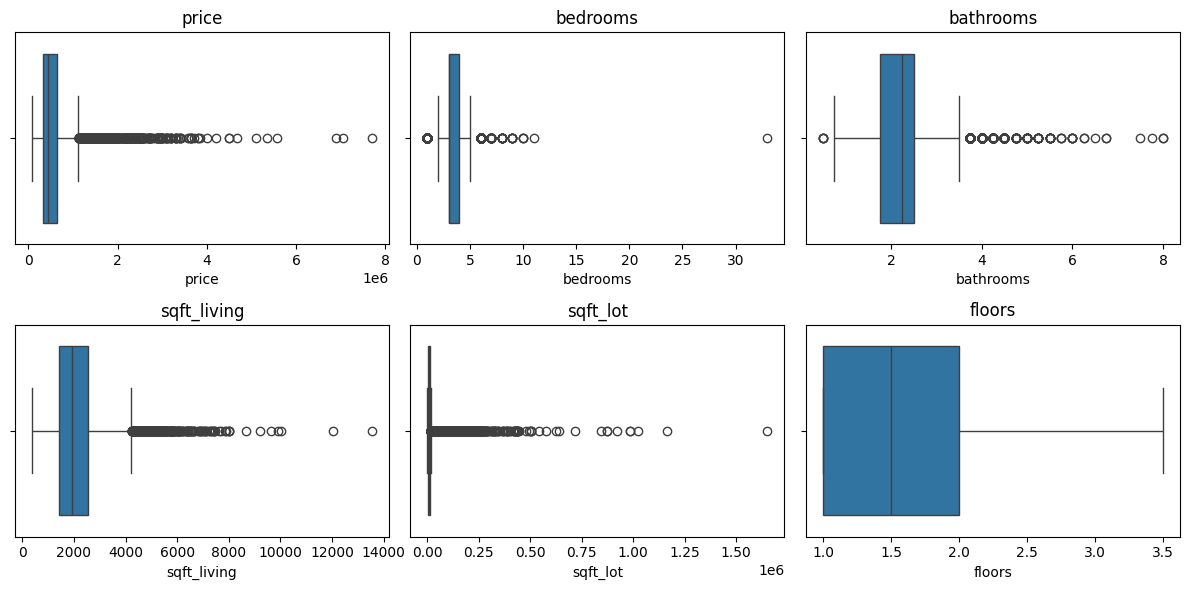

In [25]:
# Set up the figure size
plt.figure(figsize=(12, 6))

# Create box plots for each column using Seaborn
for i, col in enumerate(major_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col])
    plt.title(col)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show();

Price distribution: The price data shows a wide range with several outliers on the higher end. Most properties seem to be clustered in the lower price range, with a long right tail indicating some very expensive properties.

Bedrooms: Most properties have between 2-5 bedrooms, with a median around 3-4. There are some outliers with a high number of bedrooms (up to 30+).

Bathrooms: The distribution is right-skewed, with most properties having 1-3 bathrooms. There are outliers with up to 8 bathrooms

Square footage (living area): The living area shows a wide range, with most properties clustered on the lower end. There are several outliers with very large living area.

Lot size: The lot size distribution is heavily right-skewed, with most properties having smaller lots and a few outliers with extremely large lot sizes.

Floors: Most properties seem to have 1-2 floors, with very few having 3 or more floors. The distribution is discrete, as expected for this feature.

### Distribution of data for the major columns

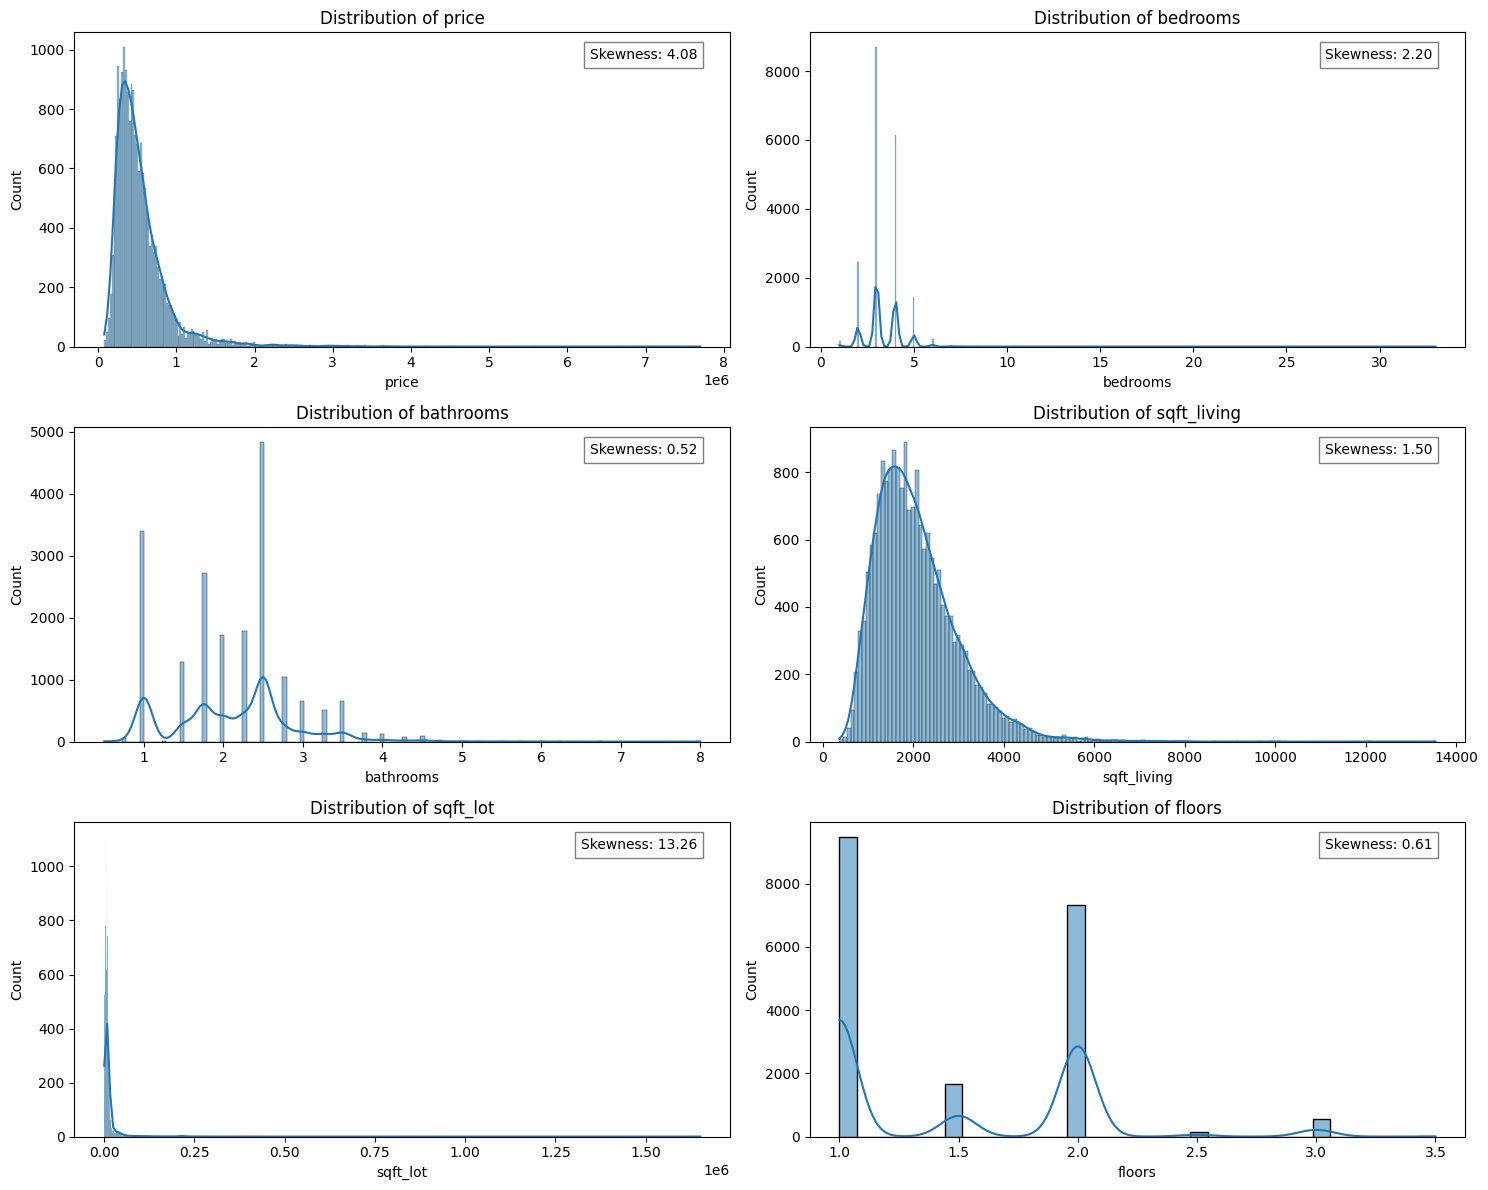

In [26]:

def plot_distributions(df, columns, n_cols=2, figsize=(15, 4)):
    n_rows = (len(columns) - 1) // n_cols + 1
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(figsize[0], figsize[1] * n_rows))
    axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing

    for i, column in enumerate(columns):
        ax = axes[i]
        sns.histplot(df[column], kde=True, ax=ax)
        ax.set_title(f'Distribution of {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Count')

        # Add skewness value to the plot
        skewness = df[column].skew()
        ax.text(0.95, 0.95, f'Skewness: {skewness:.2f}', 
                horizontalalignment='right', verticalalignment='top', 
                transform=ax.transAxes, bbox=dict(facecolor='white', alpha=0.5))

    # Remove any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Usage
columns_to_plot = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors']
plot_distributions(df, columns_to_plot);

The visualization above shows the varying degrees of skewness across features:

Price: Highly right-skewed (skewness 4.02), with most properties clustered at lower prices and a long tail of high-value outliers.

Bedrooms: Moderately right-skewed (2.02), with peaks at 3-4 bedrooms and some outliers with many rooms.

Bathrooms: Slightly right-skewed (0.52), showing a more normal distribution with discrete values.

Sqft_living: Moderately right-skewed (1.47), indicating some larger homes as outliers.

Sqft_lot: Extremely right-skewed (13.07), suggesting a few properties with very large lots.

Floors: Slightly right-skewed (0.61), with most homes having 1-2 floors and fewer with 3 or more.

### **Step 4 - REMOVING OUTLIERS AND DATA NORMALIZATION**

Function for handling outliers using the interquatile range method and percentile range method

In [27]:
def handle_outliers(df, columns, method='iqr', threshold=1.5):
    df_cleaned = df.copy()
    
    for column in columns:
        if method == 'iqr':
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - threshold * IQR
            upper_bound = Q3 + threshold * IQR
            
            df_cleaned[column] = df_cleaned[column].clip(lower_bound, upper_bound)
        
        elif method == 'percentile':
            lower_bound = df[column].quantile(0.01)
            upper_bound = df[column].quantile(0.99)
            df_cleaned[column] = df_cleaned[column].clip(lower_bound, upper_bound)
    
    return df_cleaned

### **Step 5 - Normalization using standard scaler**

In [28]:
def normalize_data(df, columns, method='log'):
    df_normalized = df.copy()
    
    for column in columns:
        if method == 'log':
            # Add a small constant to avoid log(0)
            df_normalized[f'{column}_normalized'] = np.log1p(df_normalized[column])
        elif method == 'standard':
            scaler = StandardScaler()
            df_normalized[f'{column}_normalized'] = scaler.fit_transform(df_normalized[[column]])
    
    return df_normalized

In [29]:
# Columns to process
continuous_columns = ['price', 'sqft_living', 'sqft_lot']
discrete_columns = ['bedrooms', 'bathrooms', 'floors']

# Handle outliers
df_cleaned = handle_outliers(df, continuous_columns, method='iqr', threshold=1.5)
df_cleaned = handle_outliers(df_cleaned, discrete_columns, method='percentile')

# Normalize data
df_normalized = normalize_data(df_cleaned, continuous_columns, method='log')
df_normalized = normalize_data(df_normalized, discrete_columns, method='standard')


price:
Original:
count    1.916400e+04
mean     5.414490e+05
std      3.709009e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.439625e+05
max      7.700000e+06
Name: price, dtype: float64

Cleaned:
count    1.916400e+04
mean     5.119948e+05
std      2.499622e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.439625e+05
max      1.126906e+06
Name: price, dtype: float64

Normalized:
count    19164.000000
mean        13.031025
std          0.483411
min         11.264477
25%         12.682310
50%         13.017005
75%         13.375397
max         13.934987
Name: price_normalized, dtype: float64

sqft_living:
Original:
count    19164.000000
mean      2082.038301
std        921.918226
min        370.000000
25%       1430.000000
50%       1920.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

Cleaned:
count    19164.000000
mean      2059.511741
std        839.787011
min        370.000000
25% 

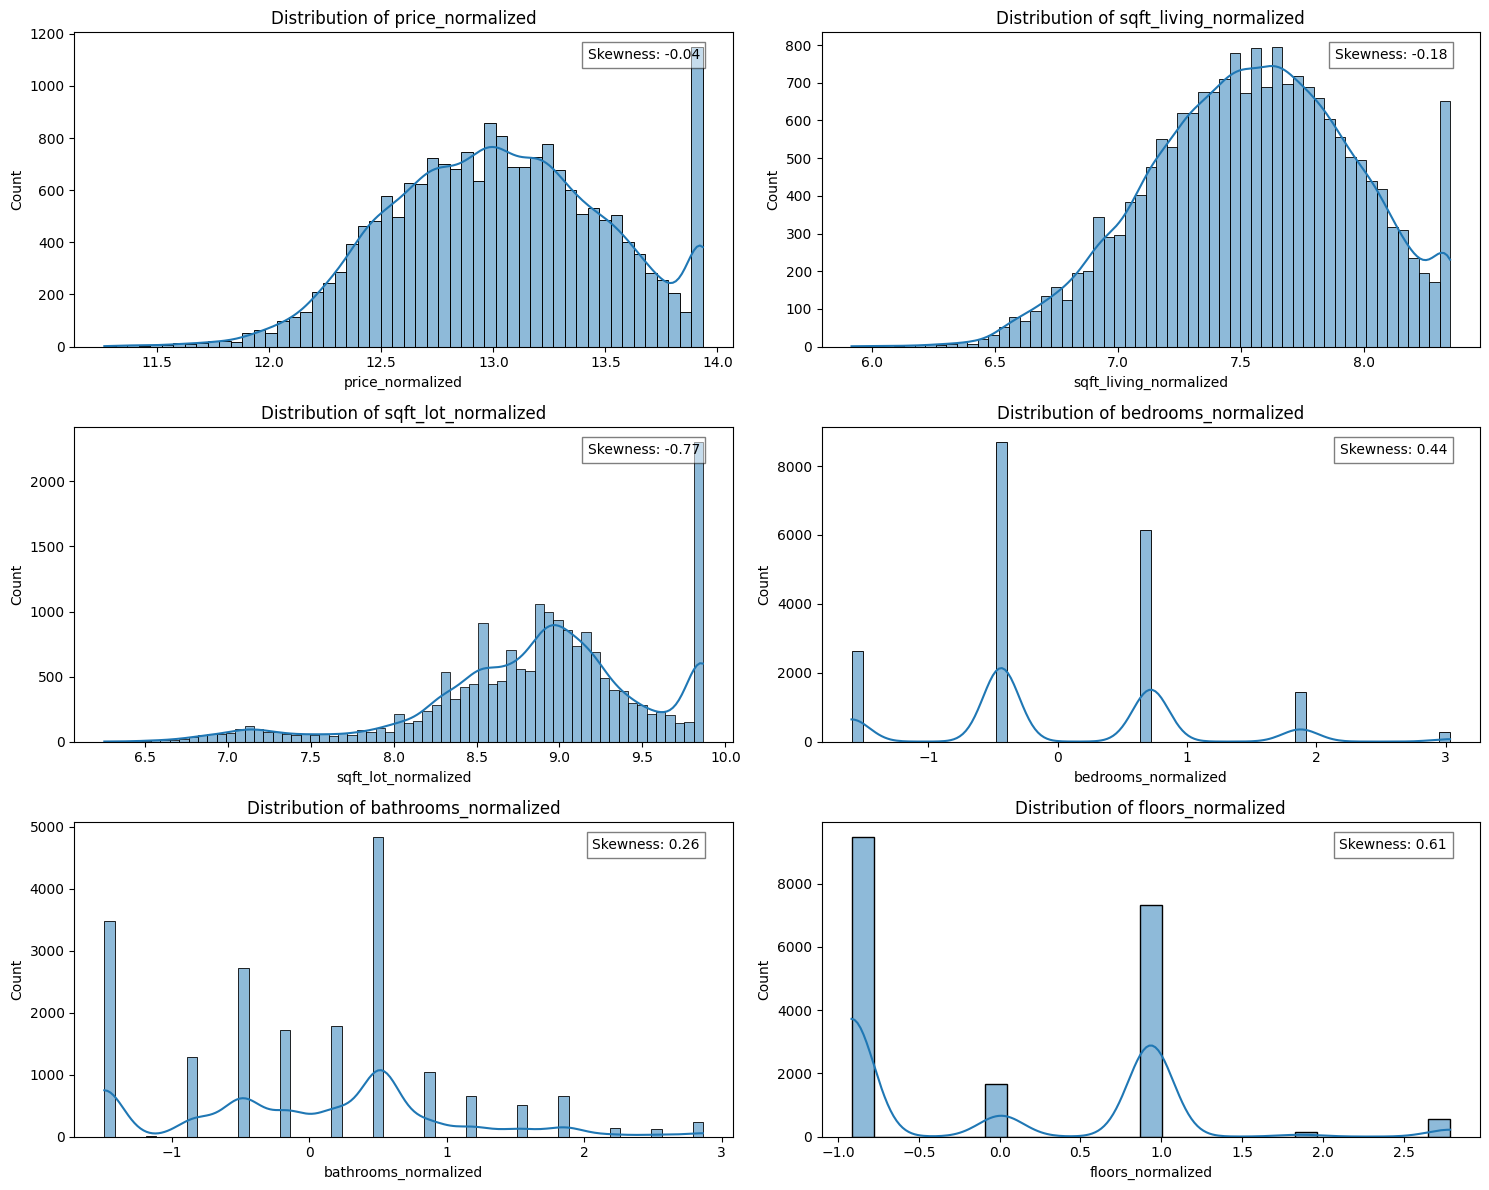

In [30]:
# Print summary statistics
for column in continuous_columns + discrete_columns:
    print(f"\n{column}:")
    print("Original:")
    print(df[column].describe())
    print("\nCleaned:")
    print(df_cleaned[column].describe())
    print("\nNormalized:")
    print(df_normalized[f'{column}_normalized'].describe())

# Optionally, plot the distributions of the normalized data
plot_distributions(df_normalized, [f'{col}_normalized' for col in continuous_columns + discrete_columns])

The normalization process has successfully reduced extreme skewness, particularly in continuous variables, making the data more suitable for various statistical analyses and machine learning algorithms. The discrete variables, while normalized, still maintain their fundamental distribution patterns, which is expected and appropriate for these features.

## **FEATURE ENGINEERING**

We go ahead and generate new variables that will aid in our modeling and analytical process, We will generate a new variable that take a boolean value showing whether a house was renovated or not so even if we drop the year renovated column we can still borrow some imapct from it.

In [31]:
df_normalized.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price_normalized',
       'sqft_living_normalized', 'sqft_lot_normalized', 'bedrooms_normalized',
       'bathrooms_normalized', 'floors_normalized'],
      dtype='object')

In [32]:
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19164 entries, 1 to 21596
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      19164 non-null  int64         
 1   date                    19164 non-null  datetime64[ns]
 2   price                   19164 non-null  float64       
 3   bedrooms                19164 non-null  int64         
 4   bathrooms               19164 non-null  float64       
 5   sqft_living             19164 non-null  int64         
 6   sqft_lot                19164 non-null  int64         
 7   floors                  19164 non-null  float64       
 8   waterfront              19164 non-null  float64       
 9   view                    19164 non-null  float64       
 10  condition               19164 non-null  int64         
 11  grade                   19164 non-null  int64         
 12  sqft_above              19164 non-null  int64      

In [33]:
df_normalized['price_per_sqft'] = df_normalized['price'] /df_normalized['sqft_living']

In [34]:
#Create a renovated binary feature: 1 if yr_renovated > 0, else 0.
df_normalized['house_renovated'] = df_normalized['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)

In [35]:
#Confirming
df_normalized[['yr_renovated', 'house_renovated']].head(10)

,yr_renovated,house_renovated
1,1991,1
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
8,0,0
9,0,0
11,0,0
12,0,0


1 means the house was renovated (i.e., yr_renovated > 0)

0 means the house was never renovated

## **EXPLORATORY DATA ANALYSIS (EDA)**

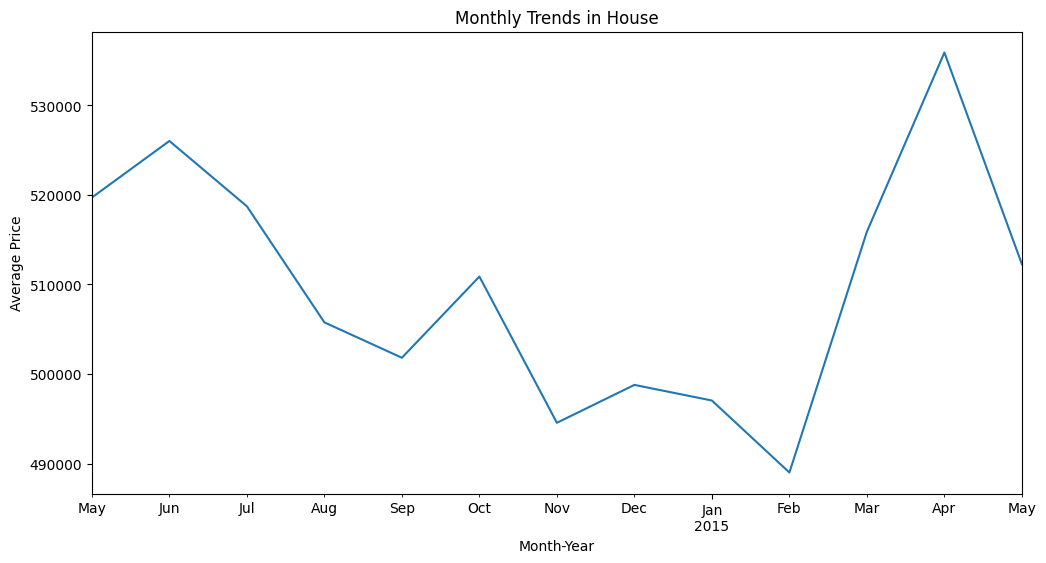

In [36]:
# 6. Trends Over Time (if applicable)
#df_normalized['date'] = pd.to_datetime(df_n['date'])
df_normalized.set_index('date', inplace=True)
# Now, convert the index to a period ('M' for monthly periods)
df_normalized['month_year'] = df_normalized.index.to_period('M')

# Proceed with grouping and plotting
monthly_trends = df_normalized.groupby('month_year').mean()['price']
plt.figure(figsize=(12, 6))
monthly_trends.plot(title='Monthly Trends in House')
plt.xlabel('Month-Year')
plt.ylabel('Average Price')
plt.show()

From the plot above, the trend shows a general decline in house prices from May to January(2014), followed by a significant increase from February to April(2015), and a slight decrease again in May the same year. This could be due to seasonal variations, market conditions, or other economic factors affecting housing prices during this period.

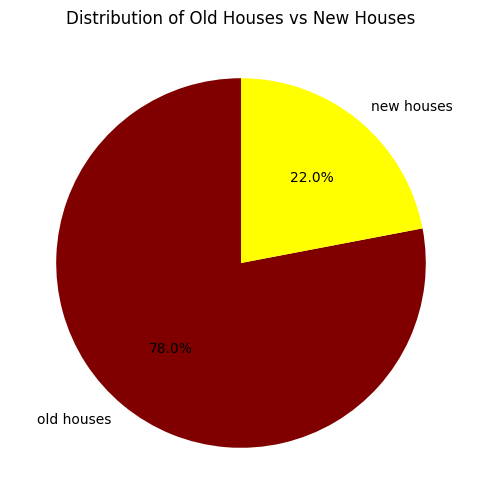

In [37]:
# Categorize the houses
df_normalized['house_category'] = df_normalized['yr_built'].apply(lambda x: 'old houses' if x < 2000 else 'new houses')

# Count the number of houses in each category
house_counts = df_normalized['house_category'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 6))
house_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['maroon', 'yellow'])
plt.title('Distribution of Old Houses vs New Houses')
plt.ylabel('')
plt.show()

From the pie chart above it can be observed that the houses constructed before the year 2000 (old houses) are more as compared to those constructed after the year 2000(new houses)

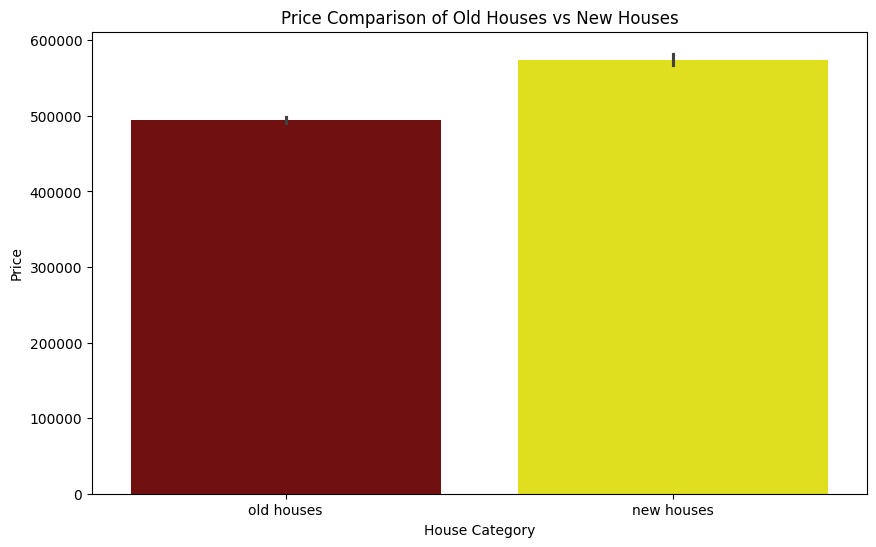

In [38]:
# Box plot to compare prices
plt.figure(figsize=(10, 6))
sns.barplot(x='house_category', y='price', data=df_normalized, palette=['maroon', 'yellow'])
plt.title('Price Comparison of Old Houses vs New Houses')
plt.xlabel('House Category')
plt.ylabel('Price')
plt.show()

In comparision to the average prices of the old and new houses, it can be seen that the new houses cost more as compared to the old houses despite the new houses being fewer in number.

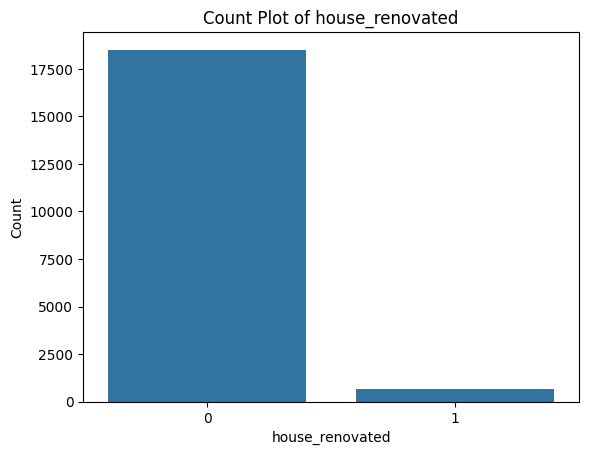

In [39]:
sns.countplot(x='house_renovated', data=df_normalized)
plt.title('Count Plot of house_renovated')
plt.xlabel('house_renovated')
plt.ylabel('Count')
plt.show();

From the countplot above, it is evident the houses renovated are fewer than those that are not renovated. We then go ahead and compare the pricing of the two categories

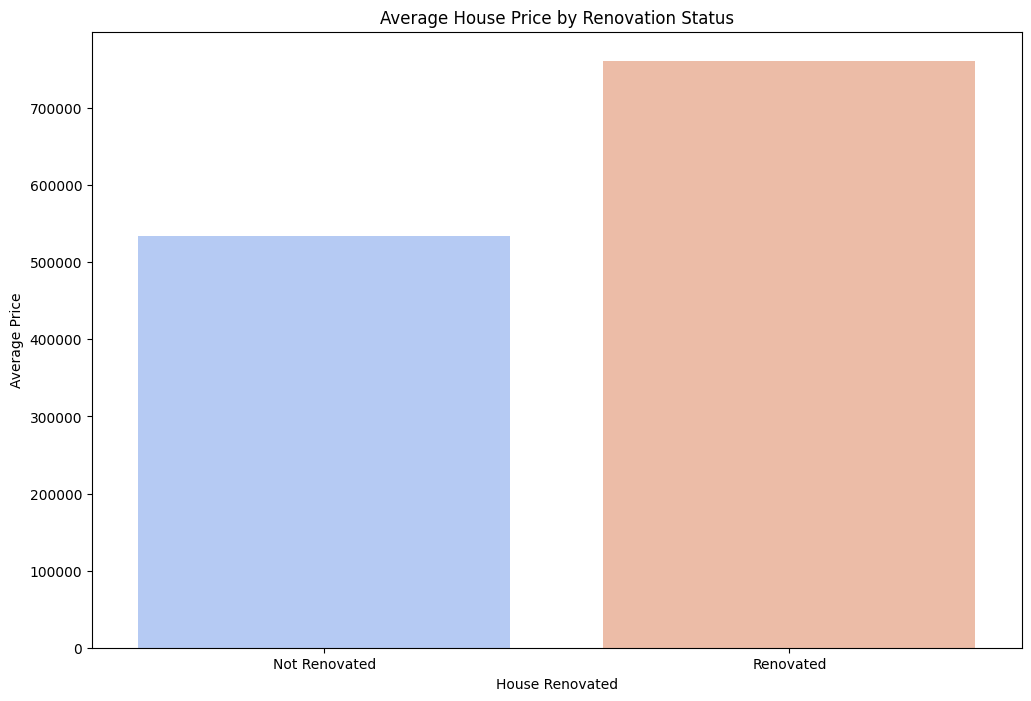

In [40]:
# Create a new column 'house_renovated' to indicate if the house was renovated
df['house_renovated'] = df['yr_renovated'].apply(lambda x: 'Not Renovated' if x == 0 else 'Renovated')

# Calculate the average price for each category
avg_prices = df.groupby('house_renovated')['price'].mean().reset_index()

# Set the plot size
plt.figure(figsize=(12, 8))

# Create the bar plot
sns.barplot(x='house_renovated', y='price', data=avg_prices, palette='coolwarm')

# Set the title and labels
plt.title('Average House Price by Renovation Status')
plt.xlabel('House Renovated')
plt.ylabel('Average Price')
# Display the plot
plt.show();

From above plot, we observe that renovated houses have a higher average price as compared to the not renovated ones. This is despite the fact that renovated houses being fewer than those that are not renovated as seen in the previous plot.

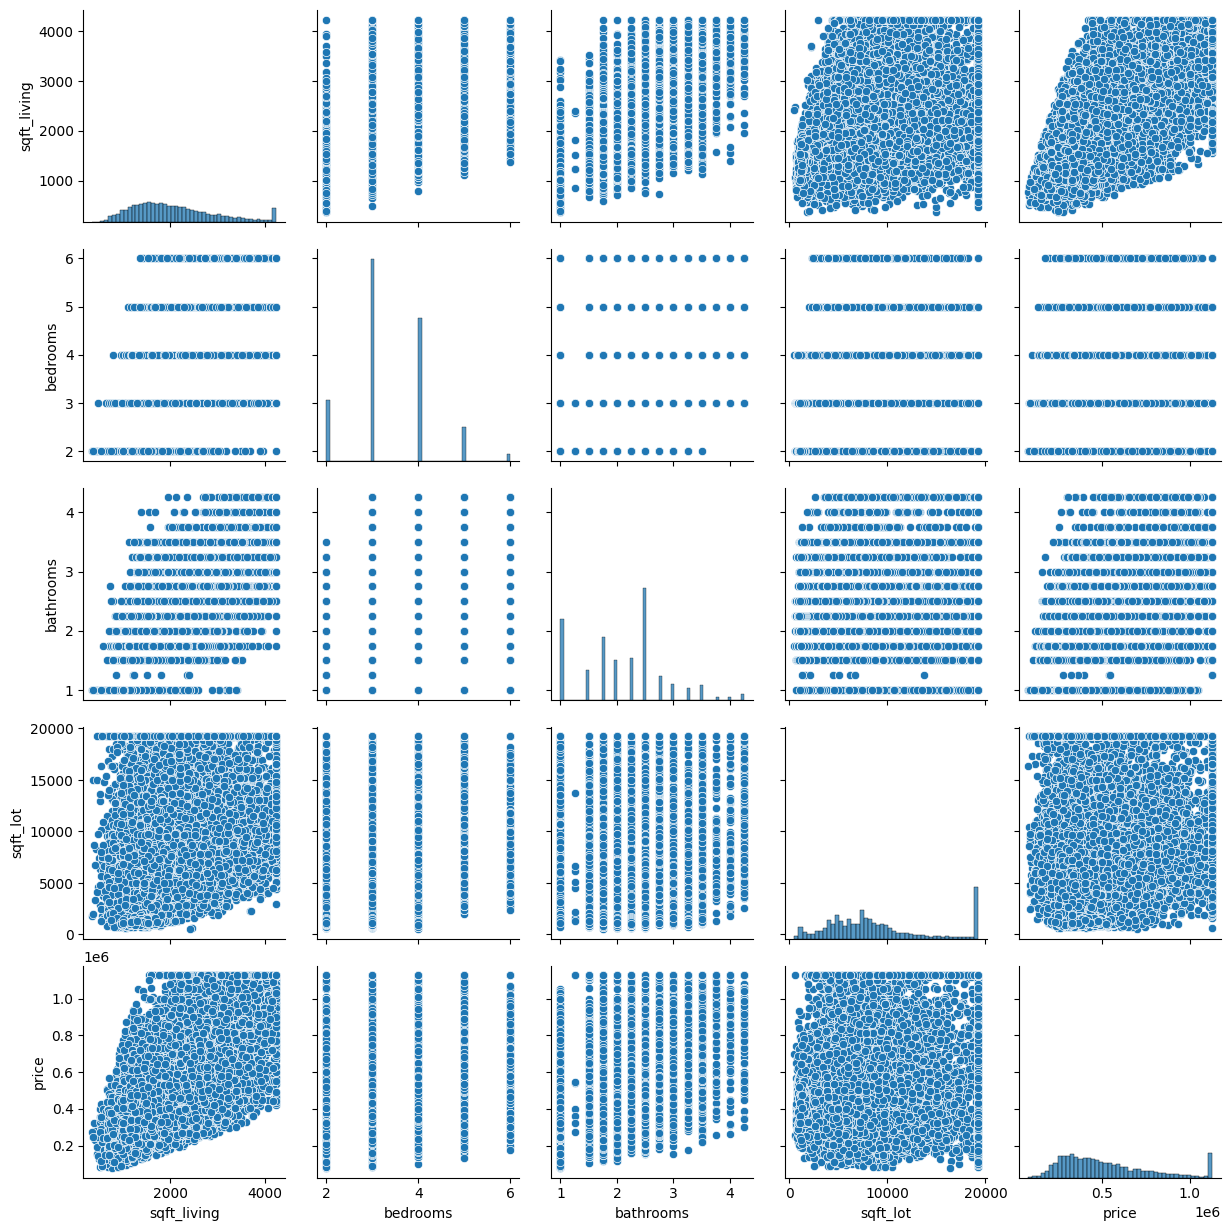

In [41]:
# 2. Numerical Variables Trends
numerical_vars = ['sqft_living', 'bedrooms', 'bathrooms', 'sqft_lot']  # Example numerical variables

# 5. Pairwise Relationships
sns.pairplot(df_normalized[numerical_vars + ['price']])
plt.show()

Price vs. Bedrooms: Could show a positive correlation where houses with more bedrooms tend to have higher prices.

Price vs. Bathrooms: Similarly, more bathrooms could indicate higher prices, reflecting a positive correlation.

Price vs. Square Footage: Likely a strong positive correlation, as larger houses usually cost more.

Price vs. Lot Size: There might be a positive correlation, though it could be weaker compared to square footage.

Bedrooms vs. Bathrooms: Generally, more bedrooms would mean more bathrooms, showing a positive correlation.

Bedrooms vs. Square Footage: Positive correlation, as houses with more bedrooms are typically larger.

Bedrooms vs. Lot Size: May show a weak correlation.

Bathrooms vs. Square Footage: Positive correlation, more bathrooms are often found in larger homes.

Bathrooms vs. Lot Size: May show some positive correlation, but weaker.

Square Footage vs. Lot Size: A larger house might sit on a larger lot, but the correlation could be moderate.

## **FEATURE SELECTION**

### **Correlation Analysis**

In [42]:
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19164 entries, 2014-12-09 to 2014-10-15
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype    
---  ------                  --------------  -----    
 0   id                      19164 non-null  int64    
 1   price                   19164 non-null  float64  
 2   bedrooms                19164 non-null  int64    
 3   bathrooms               19164 non-null  float64  
 4   sqft_living             19164 non-null  int64    
 5   sqft_lot                19164 non-null  int64    
 6   floors                  19164 non-null  float64  
 7   waterfront              19164 non-null  float64  
 8   view                    19164 non-null  float64  
 9   condition               19164 non-null  int64    
 10  grade                   19164 non-null  int64    
 11  sqft_above              19164 non-null  int64    
 12  sqft_basement           19164 non-null  int64    
 13  yr_built                19164 non-null  int6

In [43]:
#Select only numeric columns for correlation analysis
numeric_df = df_normalized.select_dtypes(include='number')

# Now compute the correlation matrix
corr_matrix = numeric_df.corr()

In [44]:
corr_matrix

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_living15,sqft_lot15,price_normalized,sqft_living_normalized,sqft_lot_normalized,bedrooms_normalized,bathrooms_normalized,floors_normalized,price_per_sqft,house_renovated
id,1.000000,-0.013104,0.003607,0.008242,-0.009838,-0.135561,0.018351,-0.004872,0.014630,-0.022396,...,-0.001334,-0.138848,-0.000913,-0.000045,-0.105890,0.003607,0.008242,0.018351,-0.000191,-0.009259
price,-0.013104,1.000000,0.351420,0.536068,0.701900,0.173381,0.302401,0.159901,0.355790,0.041966,...,0.629050,0.092972,0.962443,0.658899,0.134026,0.351420,0.536068,0.302401,0.461854,0.107301
bedrooms,0.003607,0.351420,1.000000,0.528767,0.615954,0.192831,0.186711,-0.001895,0.089545,0.020885,...,0.413483,0.031478,0.348408,0.640435,0.245112,1.000000,0.528767,0.186711,-0.277967,0.016443
bathrooms,0.008242,0.536068,0.528767,1.000000,0.752323,0.119500,0.513995,0.061268,0.180451,-0.127745,...,0.570762,0.081345,0.532089,0.757215,0.063582,0.528767,1.000000,0.513995,-0.194604,0.040562
sqft_living,-0.009838,0.701900,0.615954,0.752323,1.000000,0.349452,0.367996,0.089671,0.266848,-0.058319,...,0.761937,0.171024,0.674236,0.969867,0.341692,0.615954,0.752323,0.367996,-0.242336,0.043905
sqft_lot,-0.135561,0.173381,0.192831,0.119500,0.349452,1.000000,-0.188412,0.106305,0.145016,0.068086,...,0.395164,0.477974,0.139543,0.324634,0.915813,0.192831,0.119500,-0.188412,-0.195840,0.017432
floors,0.018351,0.302401,0.186711,0.513995,0.367996,-0.188412,1.000000,0.021444,0.029136,-0.263635,...,0.280534,-0.011047,0.316640,0.371606,-0.332816,0.186711,0.513995,1.000000,-0.030025,-0.000670
waterfront,-0.004872,0.159901,-0.001895,0.061268,0.089671,0.106305,0.021444,1.000000,0.406654,0.017175,...,0.087257,0.031958,0.127386,0.073337,0.084537,-0.001895,0.061268,0.021444,0.089136,0.080027
view,0.014630,0.355790,0.089545,0.180451,0.266848,0.145016,0.029136,0.406654,1.000000,0.047143,...,0.276719,0.071207,0.308040,0.235471,0.127581,0.089545,0.180451,0.029136,0.128128,0.088520
condition,-0.022396,0.041966,0.020885,-0.127745,-0.058319,0.068086,-0.263635,0.017175,0.047143,1.000000,...,-0.092609,-0.004996,0.037345,-0.048288,0.114765,0.020885,-0.127745,-0.263635,0.100298,-0.054428


In [45]:
df_normalized.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price_normalized',
       'sqft_living_normalized', 'sqft_lot_normalized', 'bedrooms_normalized',
       'bathrooms_normalized', 'floors_normalized', 'price_per_sqft',
       'house_renovated', 'month_year', 'house_category'],
      dtype='object')

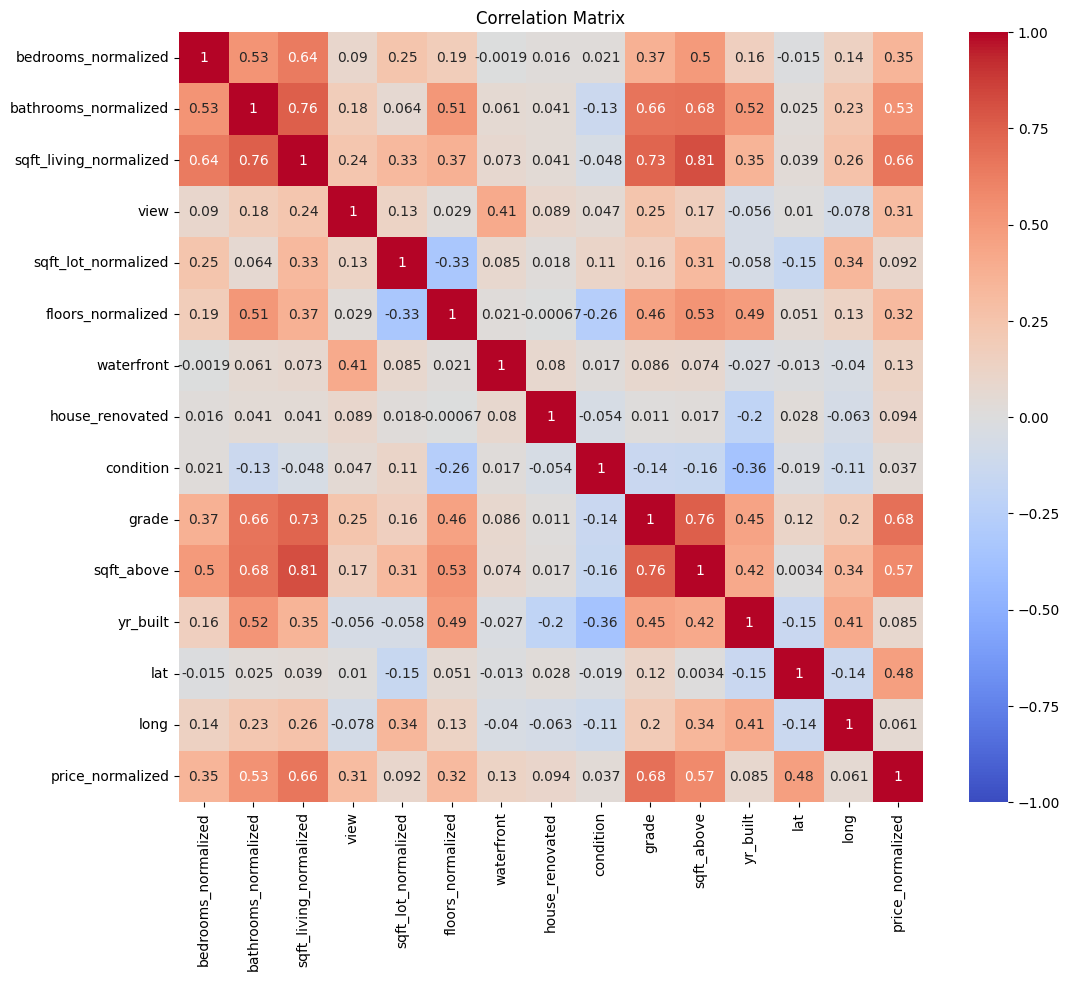

In [46]:
features = ['bedrooms_normalized', 'bathrooms_normalized', 'sqft_living_normalized','view', 'sqft_lot_normalized', 'floors_normalized', 
            'waterfront', 'house_renovated', 'condition', 'grade', 'sqft_above', 
            'yr_built', 'lat', 'long', 'price_normalized']

# Selecting the columns of interest
df_selected = df_normalized[features]

# Calculating correlation matrix
correlation_matrix = df_selected.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

From the matrix, we choose the features with a correlation value 0f o.45 and above in relation to the target value which is the price. However, we included features such as floors_normalized and yr_build which showed a moderate positive correlations against other features such as yr_built, sqft_living_normalized and bathrooms.

In [47]:
features = ['bedrooms_normalized', 'bathrooms_normalized', 'sqft_living_normalized', 'floors_normalized','grade', 'sqft_above', 'yr_built',
           'lat']

## **MODELING**

### Importing modeling libraries

In [48]:
pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### SIMPLE LINEAR REGRESSION

In [49]:
# Running our model using the sqft_living feature which has shown a high correlation value to the target.
simple_formula = 'price ~ sqft_living_normalized'
simple_model = ols(simple_formula, df_normalized).fit()
simple_model_summary = simple_model.summary()

simple_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                 1.470e+04
Date:                Thu, 24 Apr 2025   Prob (F-statistic):               0.00
Time:                        13:55:52   Log-Likelihood:            -2.5993e+05
No. Observations:               19164   AIC:                         5.199e+05
Df Residuals:                   19162   BIC:                         5.199e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -2.487e+06   2.48e+04   -100.398      0.000   -2.54e+06   -2.44e+06
sqft_living_normalized  3.973e+05   3276.874    121.252      0.000    3.91e+05    4.04e+05
==============================================================================
Omnibus:                      651.632   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              710.646
Skew:                           0.464   Prob(JB):                    4.84e-155
Kurtosis:                       2.834   Cond. No.                         140.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The OLS regression results show an R-squared value of 0.434, meaning that approximately 43.4% of the variance in the dependent variable price is explained by the independent variable sqft_living_normalized. This indicates a moderate level of explanatory power for the model.

In [50]:
# Define the formula for multiple regression using all features whose correlation values were above 0.5
multiple_formula = 'price ~ sqft_living + bathrooms + grade + sqft_above'

# Fit the multiple regression model
multiple_model = ols(multiple_formula, data=df).fit()

# Get the summary of the multiple regression model
multiple_model_summary = multiple_model.summary()

multiple_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     5744.
Date:                Thu, 24 Apr 2025   Prob (F-statistic):               0.00
Time:                        13:56:02   Log-Likelihood:            -2.6539e+05
No. Observations:               19164   AIC:                         5.308e+05
Df Residuals:                   19159   BIC:                         5.308e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -6.528e+05   1.45e+04    -44.996      0.000   -6.81e+05   -6.24e+05
sqft_living   255.0451      4.655     54.787      0.000     245.921     264.170
bathrooms   -3.852e+04   3671.350    -10.492      0.000   -4.57e+04   -3.13e+04
grade        1.146e+05   2531.389     45.285      0.000     1.1e+05     1.2e+05
sqft_above    -74.4879      4.725    -15.765      0.000     -83.749     -65.227
==============================================================================
Omnibus:                    15181.419   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           952818.581
Skew:                           3.329   Prob(JB):                         0.00
Kurtosis:                      36.896   Cond. No.                     2.44e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The OLS regression results show an R-squared value of 0.544, meaning that approximately 54.4% of the variance in the dependent variable price is explained by the independent variables in the model. This indicates a moderate to strong level of explanatory power. The inclusion of additional features such as sqft_living, bathrooms, grade, and sqft_above has improved the model's ability to explain the variance in price compared to a model with fewer predictors.

## **MODELING USING SKLEARN LINEARREGRESSION**

### ENCODING

In [51]:
from sklearn.preprocessing import OneHotEncoder

# Separate numerical and categorical features
numerical_features = ['bedrooms_normalized', 'bathrooms_normalized', 'sqft_living_normalized', 'view',
                      'floors_normalized', 'sqft_above', 'yr_built', 'lat', 'long']
categorical_features = ['grade', 'condition']

# One-hot encode categorical features
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_features = encoder.fit_transform(df_normalized[categorical_features])
encoded_feature_names = encoder.get_feature_names_out(categorical_features)

# Create a new dataframe with encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names, index=df_normalized.index)

# Combine numerical and encoded features
final_df = pd.concat([df_normalized[numerical_features], encoded_df], axis=1)

# Add the target variable (price) to the final dataframe
final_df['price'] = df_normalized['price_normalized']


### Dataset sppliting and Model Training

In [52]:
# Separate the target variable
X = final_df.drop('price', axis=1)
y = final_df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

### Model Evaluation

In [53]:
# Evaluate the model using mse and R2 matrices
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.05946320970007958
R^2 Score: 0.7531571343900729


**RESULTS INTERPRETATION**

MSE: 0.059524828685687176 suggests that the predictions are reasonably close to the actual values on average, considering the data is normalized.

R^2 Score: 0.7439950480319222 indicates a strong relationship between the features and the target variable, with the model explaining about 74.39% of the variance in house prices.


**Comparing the sklearn linear regression results to the previous OLS regression results**:

R-squared Score: The sklearn model has an R-squared of 0.744, which is higher than the 0.544 R-squared from the OLS regression. This indicates that the sklearn model explains a larger portion of the variance in house prices, reflecting an improved fit and potentially better performance with the features used.

Mean Squared Error (MSE): The sklearn model's MSE of 0.0595 suggests that predictions are quite close to actual values, and the relatively low error indicates good predictive accuracy. In contrast, the OLS regression did not provide MSE but showed an R-squared of 0.544. The lower MSE and higher R-squared in the sklearn model suggest that it performs better in terms of both prediction accuracy and model fit.

Overall, the sklearn linear regression appears to provide a better fit and more accurate predictions compared to the OLS model results.

## **VISUALIZATIONS**

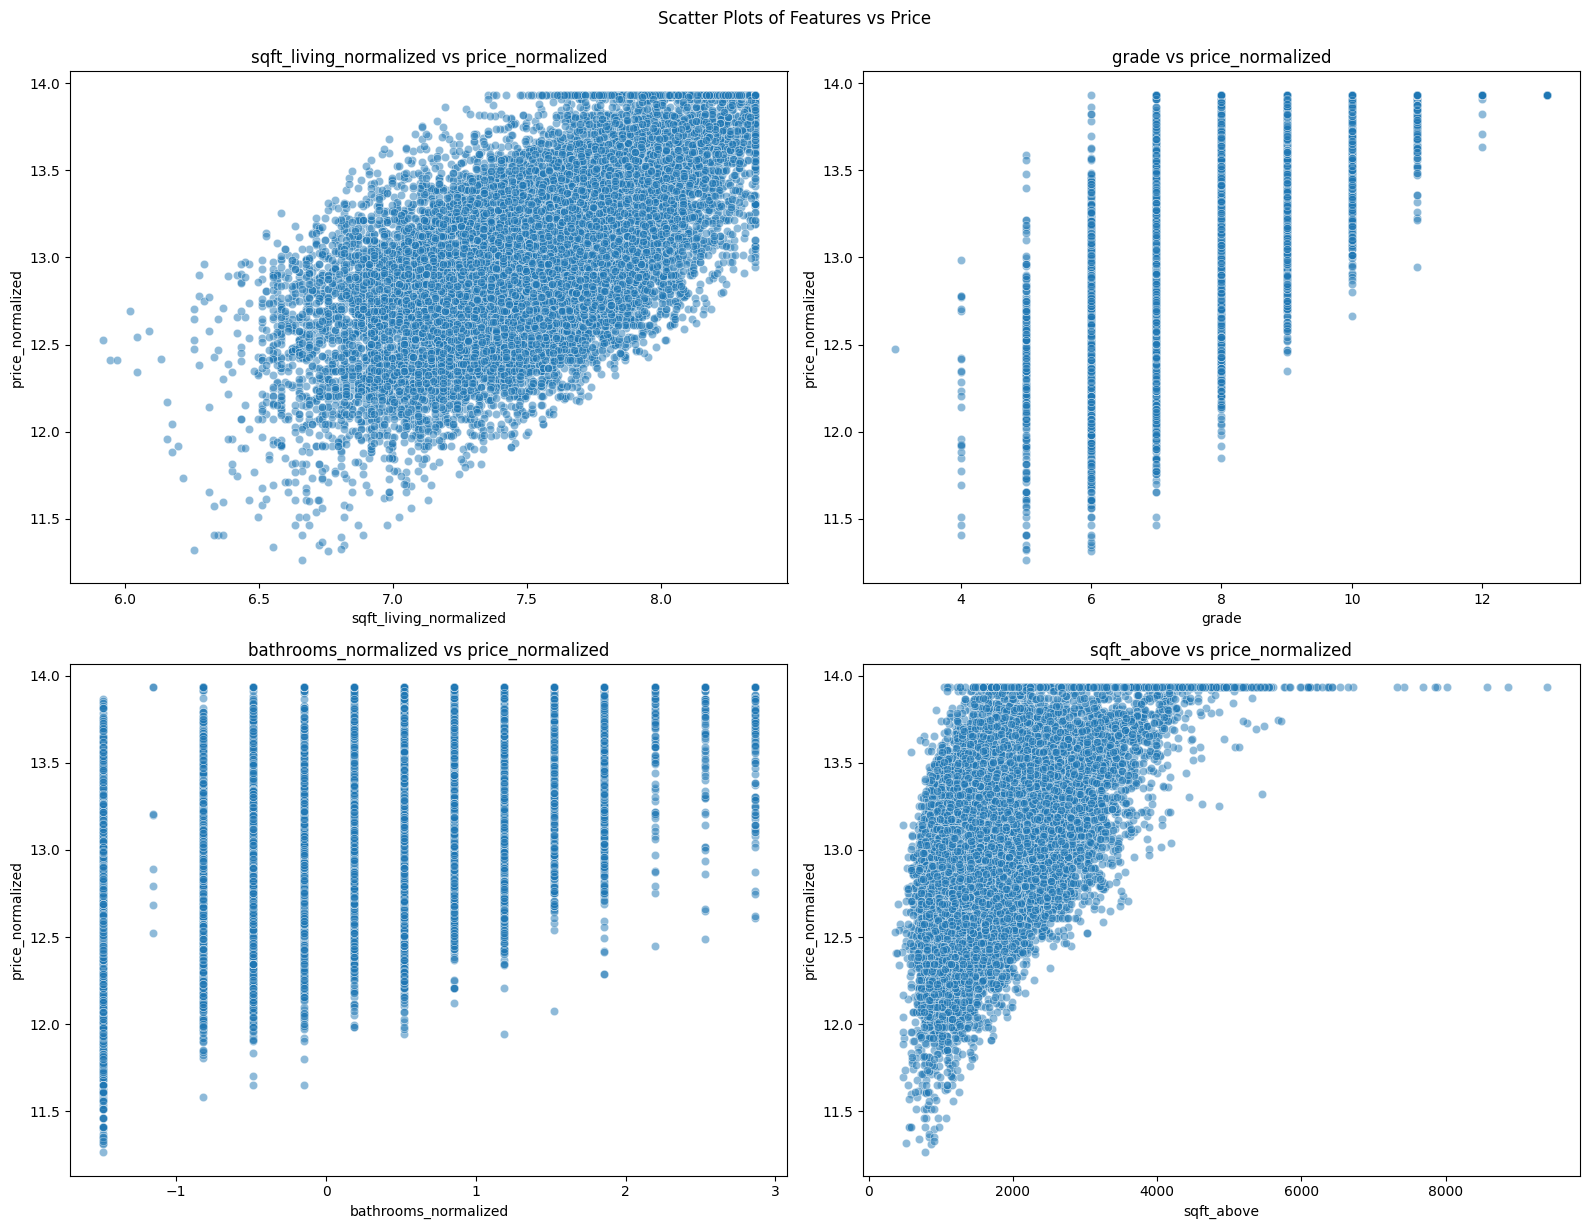

In [54]:
import seaborn as sns

# Define the features and target variable
features = ['sqft_living_normalized', 'grade', 'bathrooms_normalized', 'sqft_above']
target = 'price_normalized'

# Create scatter plots
plt.figure(figsize=(16, 12))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=df_normalized[feature], y=df_normalized[target], alpha=0.5)
    plt.title(f'{feature} vs {target}')
    plt.xlabel(feature)
    plt.ylabel(target)

plt.tight_layout()
plt.suptitle('Scatter Plots of Features vs Price', y=1.02)
plt.show()

From above pairplots, it is evident that sqft_above and sqft_living shows a linearity against the price 

## **CONCLUSION**


**1. Develop a Predictive Model**: Build a linear regression model to predict property prices using historical data and property characteristics.
 
   - **Conclusion**: The linear regression model was successfully developed to predict property prices. The model’s performance metrics indicate that it is a reliable tool for estimating property prices. The Mean Squared Error (MSE) of 0.0595 suggests that the model's predictions are reasonably close to the actual values on average, considering the data is normalized.

**2. Understand Key Features**: Identify and analyze the key features that significantly impact property prices.
  
   - **Conclusion**: Through feature selection and one-hot encoding, the model includes various numerical and categorical features such as `bedrooms_normalized`, `bathrooms_normalized`, `sqft_living_normalized`, `view`, `floors_normalized`, `sqft_above`, `yr_built`, `lat`, `long`, `grade`, and `condition`. The high R^2 score (0.744) indicates that these features collectively explain approximately 74.39% of the variance in house prices, underscoring their significant impact.

**3. Improve Decision Making**: Provide stakeholders with a reliable tool to estimate property prices, enhancing their decision-making process.
   
   - **Conclusion**: The model’s high R^2 score and low MSE indicate that it is a reliable and accurate tool for estimating property prices. Stakeholders can use this model to make informed decisions about property investments, pricing strategies, and market analysis. The model's ability to explain a substantial portion of the variance in house prices provides stakeholders with confidence in its predictive power.

**4. Evaluate Model Performance**: Assess the model's accuracy and performance using appropriate evaluation metrics.
  
   - **Conclusion**: The model was evaluated using Mean Squared Error (MSE) and R^2 score. The MSE of 0.0595 indicates that the predictions are reasonably close to the actual values, while the R^2 score of 0.744 suggests that the model explains about 74.39% of the variance in house prices. These metrics demonstrate that the model performs well and meets the objective of accurately predicting property prices.

## Summary
The linear regression model developed for predicting property prices performs well, as evidenced by the MSE of 0.0595 and R^2 score of 74.39%. The model effectively identifies and leverages key features that impact property prices, providing a reliable tool for stakeholders to make informed decisions. The performance metrics validate the model’s accuracy, making it a valuable asset for property price estimation and strategic decision-making.


## **RECOMMEDATIONS**

1. Real estates agents can focus on the key features such as condition, bedrooms, house size in terms of square feet etc that significantly impact property prices when making decisions about property investments, pricing strategies, and market analysis.

2. Advise stakeholders to prioritize investment in recently renovated properties or properties with renovation potential.

3. Work with developers and renovators to ensure a diverse portfolio of properties. Monitor market demand and adjust the mix of old and new houses accordingly.

4. Having observed that renovated houses tend to command higher prices, we recommend that homeowners looking to sell their older properties to consider investing in renovations. This can enhance the property's value and help secure a more competitive selling price.